## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [2]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2 # initialiser u 
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2 # initialiser v
    row, col = u.shape
    u0=np.ones((row, col)) # initalisation matrices(r,c) par des 1 
    v0=np.ones((row, col))
    for i in range(row): # boucler sur ligne (c'est pour U(i,j)à t=0)
        for j in range(col): # por chaque ligne boucler sur les colonnes 
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j] 
    #fill the update of u and v
    for n in range(nt): # boucler sur le temps
        for i in range(row): # boucle pour stocker Un à t=n
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):# boucle pour caclcul Un à t = n+1
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
                     
    return 0

## Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    u0=np.ones((row, col))
    v0=np.ones((row, col))
    for i in range(row):
        for j in range(col):
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j] 
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
               
    
        
    return 0

## Pyccel accelerator

In [4]:
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]', 'int', 'float','float', 'float' , 'int') # declaration des types des variables
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    import numpy as np
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    u0=np.ones((row, col))
    v0=np.ones((row, col))
    for i in range(row):
        for j in range(col):
            u0[i][j] = u[i][j] 
            v0[i][j] = v[i][j]
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j] 
                  vn[i][j] = v[i][j]    
        for i in range(1,row):
            for j in range(1,col):
                u[i][j] = un[i][j] -  u0[i][j]* dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1])
                v[i][j] = vn[i][j] -  v0[i][j]* dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1])
               
        
    return 0

## Inputs

/tmp/ipykernel_11334/4192238268.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_11334/4192238268.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


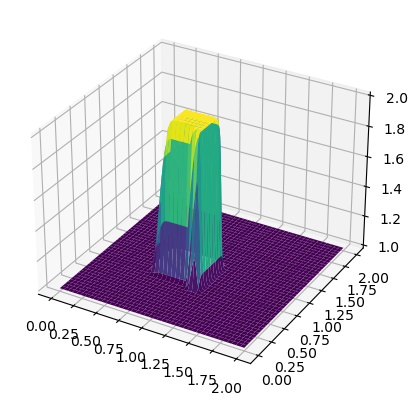

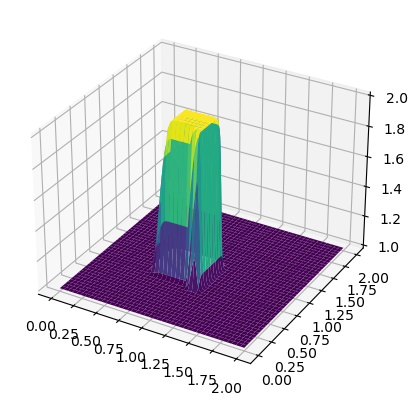

In [5]:
###variable declarations
nx = 301
ny = 301
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [12]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

1min 40s ± 2.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [7]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

39.7 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [8]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [9]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

23 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


pour la fonction de convection non lineaire en 2D, comme c'est deja constater pour le 1D, il y a une grande differnece de performance de temps de calcul entre les methode de calcul de python et les les methode d'acceleration numba et pyccel toute fois les deux methodes affiche une diffenrece de performance puisque pyccel affiche moins de temps de caclul (23 ms  contre 39 ms pour numba)
A remarquer egalement que les cacluls ont ete amplifié par rapport au cas 1D par complexité des cacluls.